In [1]:
import pandas as pd
import matplotlib.pyplot as plt  # For plotting
from matplotlib import cm 
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
import matplotlib


In [2]:
df = pd.read_csv('./files/smooth_interpolation_100_seeds_different_dist_init.csv')
train_data = pd.read_csv('./files/smooth_interpolation_train_data_different_dist_init.csv')

In [3]:
df_pre_train = pd.read_csv('./files/smooth_interpolation_pre_train_different_dist_init.csv')


In [4]:
y_hat_df = df.drop(df.columns[0], axis=1) #removing the x_test from the dataset

In [5]:
y_hat_df['Y_hat_median'] = y_hat_df.median(axis=1) #adding the median of the experiments

In [6]:
y_pre_df = df_pre_train.drop(df_pre_train.columns[0], axis=1) #removing the x_test from the dataset

In [7]:
y_pre_df['Y_hat_median'] = y_pre_df.median(axis=1) #adding the median of the experiments

In [8]:
low_quantile = 0.1
up_quantile = 0.9

y_hat_df['Y_hat_0.1_quantile'] = y_hat_df.quantile(low_quantile,axis = 1) #calculating the 10% quantile
y_hat_df['Y_hat_0.9_quantile'] = y_hat_df.quantile(up_quantile,axis = 1) #calculating the 90% quantile



In [9]:
y_pre_df['Y_hat_0.1_quantile'] = y_pre_df.quantile(low_quantile,axis = 1) #calculating the 10% quantile
y_pre_df['Y_hat_0.9_quantile'] = y_pre_df.quantile(up_quantile,axis = 1) #calculating the 90% quantile


In [10]:
fontsize= 16
ticksize = 14
figsize = (15, 8)
params = {'font.family':'serif',
    "figure.figsize":figsize,
    'figure.dpi': 80,
    'figure.edgecolor': 'k',
    'font.size': fontsize,
    'axes.labelsize': fontsize,
    'axes.titlesize': fontsize,
    'xtick.labelsize': ticksize,
    'ytick.labelsize': ticksize
}
plt.rcParams.update(params)

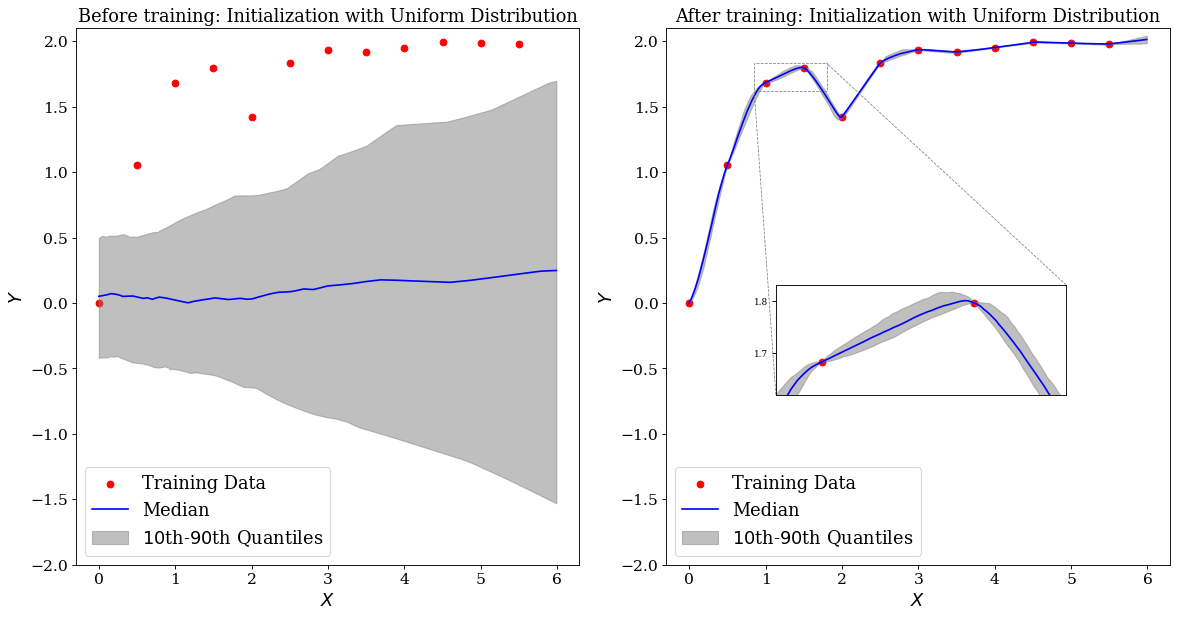

In [12]:

# First subplot
plt.subplot(1, 2 , 1)
plt.scatter(train_data["X_train"], train_data["Y_train"], color="r", label="Training Data")
plt.plot(df["X_test"], y_pre_df['Y_hat_median'], color="b", label="Median")
plt.fill_between(df["X_test"], y_pre_df['Y_hat_0.1_quantile'], y_pre_df['Y_hat_0.9_quantile'], alpha=0.5, color="gray", label="$10$th-$90$th Quantiles")
plt.xlabel(r"$X$")
plt.ylabel(r"$Y$")
plt.ylim(-2.0, 2.1)  
plt.legend(loc='best')
plt.title("Before training: Initialization with Uniform Distribution")

# Second subplot
ax2 = plt.subplot(1, 2 , 2)
plt.scatter(train_data["X_train"], train_data["Y_train"], color="r", label="Training Data")
plt.plot(df["X_test"], y_hat_df['Y_hat_median'], color="b", label="Median")
plt.fill_between(df["X_test"], y_hat_df['Y_hat_0.1_quantile'], y_hat_df['Y_hat_0.9_quantile'], alpha=0.5, color="gray", label="$10$th-$90$th Quantiles")
plt.xlabel(r"$X$")
plt.ylabel(r"$Y$")
plt.ylim(-2.0, 2.1)  
plt.legend(loc='best')
plt.title("After training: Initialization with Uniform Distribution")
plt.tight_layout()

# Add zoomed-in inset


axins = zoomed_inset_axes(
    ax2,
    4,
    loc="lower left",
    bbox_to_anchor=(0.2, 0.3, 0, 0), #(x, y, width, height)
    bbox_transform=ax2.transAxes,
)
#axins = zoomed_inset_axes(ax2, zoom=2, loc='upper left')  # Zoom factor of 2, position inset in upper left
axins.scatter(train_data["X_train"], train_data["Y_train"], color="r")
axins.plot(df["X_test"], y_hat_df['Y_hat_median'], color="b")
axins.fill_between(df["X_test"], y_hat_df['Y_hat_0.1_quantile'], y_hat_df['Y_hat_0.9_quantile'], alpha=0.5, color="gray")


x1, x2, y1, y2 = (
    0.85,
    1.8,
    1.62, 1.83,
)
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.xaxis.tick_top()
plt.xticks(fontsize=8, visible=False)
plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.yticks(fontsize=8)
mark_inset(ax2, axins, loc1=1, loc2=3, linewidth="0.7", ls="--", ec="0.5")

#plt.savefig('smooth_interpolation_100_seeds_uniform_init.pdf')
plt.show()